# Q5

In [2]:
import pandas as pd

In [51]:
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [53]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## embarked has 2 missing value

- ba mode poresh mikonam ; why?
kamtar az 1% data miss shode. 2 ta az 891 data. pas most frequent ro mizaram be jaye miss shode ha

In [54]:
mode_embarked  = df['Embarked'].mode()[0]

In [55]:
df['Embarked'] = df['Embarked'].fillna(mode_embarked)

## age 20% data miss shode dare taghriban
- ba grouped median fill mikonam miss ha ro. why?
distribution age mamolan skewed hast. 

chera grouped bashe? rich passenger with pclass 1 is generally older than worker in pclass 3 
pas moheme ke bar asas sex , pclass grouped beshe. 

in darvaghe dare az relationship feature ha preserve mikone. older, so more rich so pclass 1 for example. 

In [56]:
group_ = df.groupby(['Pclass', 'Sex'])['Age'].transform('median')
df['Age'] = df['Age'].fillna(group_)

In [57]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [58]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


drop unuseful columns

In [59]:
cols_drop = ['Cabin', 'Name', 'Ticket']
df = df.drop(cols_drop, axis = 1) #axis 0 is rows
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [60]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,21.5,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


one hot encoding for categorical features

In [61]:
df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})
df['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [ ]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True, dtype=int)
df #false 0 , true 1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7.2500,0,1
1,2,1,1,0,38.0,1,0,71.2833,0,0
2,3,1,3,0,26.0,0,0,7.9250,0,1
3,4,1,1,0,35.0,1,0,53.1000,0,1
4,5,0,3,1,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,0,1
887,888,1,1,0,19.0,0,0,30.0000,0,1
888,889,0,3,0,21.5,1,2,23.4500,0,1
889,890,1,1,1,26.0,0,0,30.0000,0,0


## split

In [63]:
from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis = 1)
y = df['Survived']

In [110]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size= 0.2,
    random_state= 42,
    stratify= y
)

In [111]:
print(f"Train shape: {X_train.shape}")
print(f"Test shape:  {X_test.shape}")

Train shape: (712, 9)
Test shape:  (179, 9)


## create and train model

In [112]:
from sklearn.tree import DecisionTreeClassifier

decisiontree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
decisiontree_model

DecisionTreeClassifier(max_depth=4, random_state=42)

In [113]:
decisiontree_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [114]:
y_hat = decisiontree_model.predict(X_test)
y_hat_train = decisiontree_model.predict(X_train)

## validate model

In [115]:
from sklearn.metrics import classification_report, accuracy_score

acc = accuracy_score(y_test, y_hat)
print(f'Acc on test : {acc}\n')
print(f'Acc on train : {accuracy_score(y_train, y_hat_train)}\n')
print('Classification Report: \n')
print(classification_report(y_test, y_hat))

Acc on test : 0.7877094972067039

Acc on train : 0.8412921348314607

Classification Report: 

              precision    recall  f1-score   support

           0       0.77      0.94      0.84       110
           1       0.84      0.55      0.67        69

    accuracy                           0.79       179
   macro avg       0.81      0.74      0.76       179
weighted avg       0.80      0.79      0.78       179



confusion matrix of model:

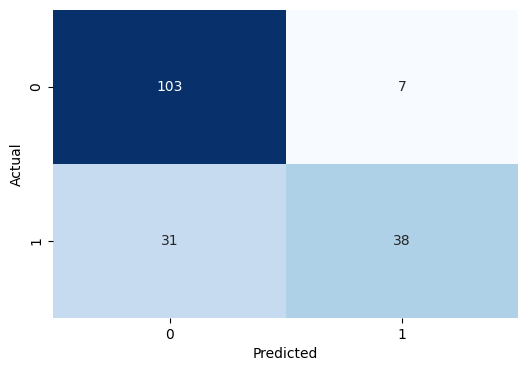

In [116]:
from sklearn.metrics import  confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_hat)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## plot tree

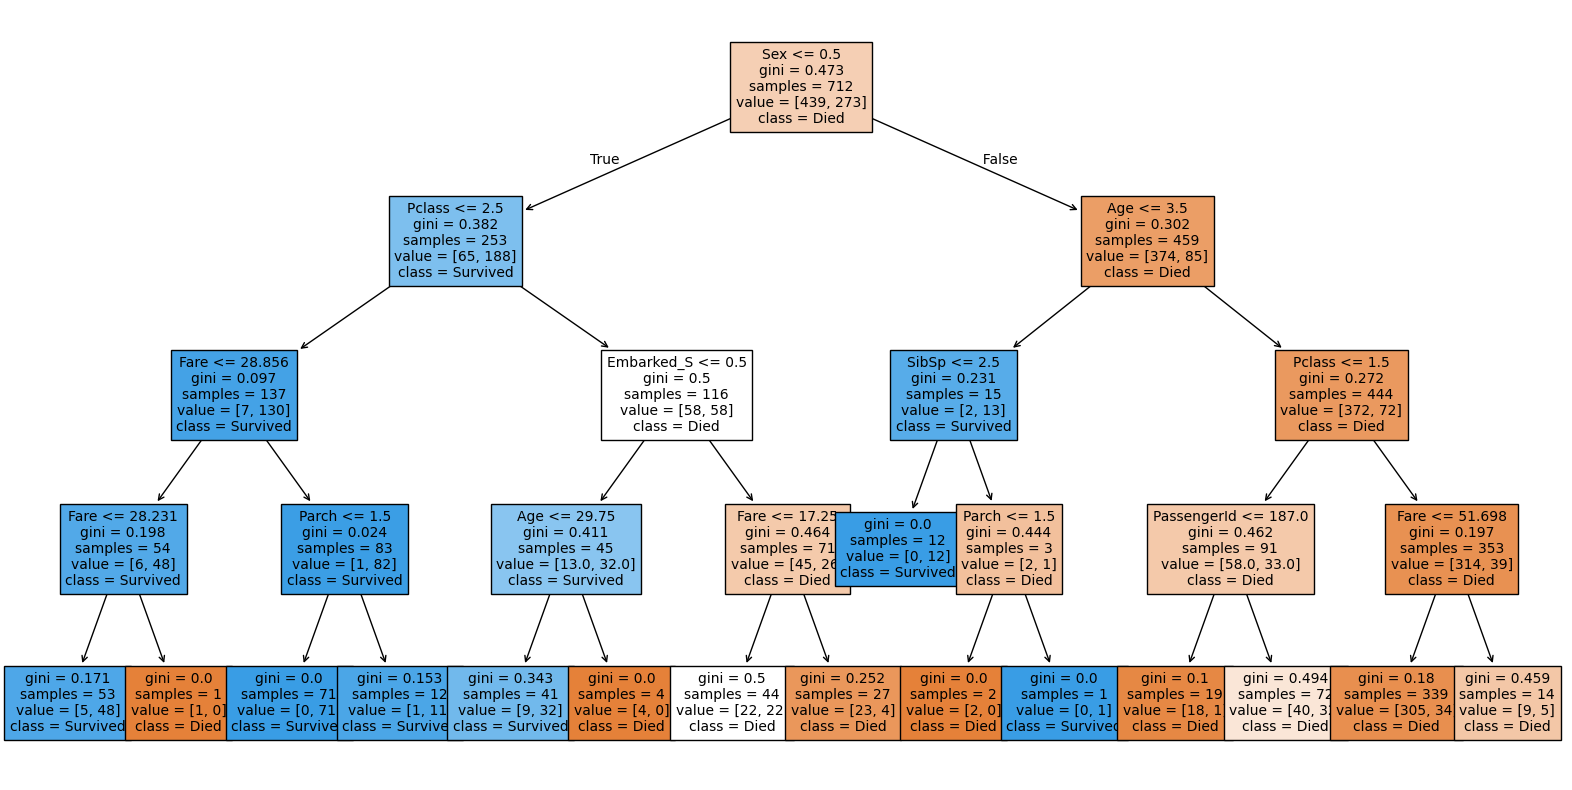

In [117]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(decisiontree_model, feature_names=X.columns, class_names = ['Died', 'Survived'], filled = True, fontsize=10)
plt.show()

In [118]:
print(f'Depth : {decisiontree_model.get_depth()}')
print(f'Leaves : {decisiontree_model.get_n_leaves()}')
print(f'Nodes : {decisiontree_model.tree_.node_count}')



Depth : 4
Leaves : 15
Nodes : 29


## from scratch DecisionTreeClassifier func neveshtam

In [119]:
import numpy as np 

class Node:
    # this class is defined for nodes 
    def __init__(self, feature_index = None, threshold = None, left = None, right = None, value = None):
        self.feature_index = feature_index  # Which column to split on
        self.threshold = threshold          # Value to split at (e.g., Age < 10)
        self.left = left                    # Left child Node
        self.right = right                  # Right child Node
        
        
        self.value = value

class My_DecisionTreeClassifier:
    def __init__(self, max_depth = None):
        self.max_depth = max_depth
        self.root = None
        
    def fit(self, X, y):
        
        X = np.array(X)
        y = np.array(y)
        self.root = self.grow_tree(X, y)
        
    def grow_tree(self, X, y, depth = 0):
        n_sample, n_feature = X.shape 
        n_label = len(np.unique(y))
        
        # alg stop mishe if:
        # 1 - max depth reside bashe 
        # 2 - purity 100 darsad beshe
        # 3- hame nemone ha barresi beshe va hich sample baghi namone
        if(self.max_depth is not None and depth >= self.max_depth) or n_label == 1 or n_sample < 2:
            leaf_node = self.most_common(y)
            return Node(value=leaf_node)
        # best_feature: Which input column should we split on at this node?
        # best_thresh : At what value of that feature should we split?
        best_feature, best_thresh = self.best_split(X, y, n_feature)
        
        if best_feature is not None:
            left_idx = X [:, best_feature] < best_thresh
            right_idx = X [:, best_feature] >= best_thresh
            
            
            left_child = self.grow_tree(X[left_idx, :], y[left_idx], depth + 1)
            right_child = self.grow_tree(X[right_idx, :], y[right_idx], depth + 1)
            
            return Node(feature_index=best_feature, threshold=best_thresh, left=left_child, right=right_child)
        return Node(value=self.most_common(y))
    
    def best_split(self, X, y, n_features):
        # loop mikone hame features ha ro ta feature ba minimized gini peyda kone
        best_gain = -1
        split_idx, split_thresh = None, None 
        parent_gini = self.gini(y) 
        for f_index in range (n_features):
            thresholds = np.unique(X[:, f_index])
            for thresh in thresholds:
                gain = self.information_gain(y,X[:, f_index], thresh, parent_gini)
                
                if gain > best_gain:
                    best_gain = gain
                    split_idx = f_index
                    split_thresh = thresh
        return split_idx, split_thresh
    
    def information_gain(self, y, X_col, threshold, parent_gini):
        left_ = X_col < threshold
        right_ = ~left_
        
        if len(y[left_]) == 0 or len(y[right_]) == 0:
            return 0
        
        n = len(y)
        n_left , n_right = len(y[left_]), len(y[right_])
        gini_left, gini_right = self.gini(y[left_]), self.gini(y[right_])
        child_gini = (n_left/n) *gini_left + (n_right/n) *gini_right
        return parent_gini - child_gini
    
    def gini(self, y):
        prob = [np.sum(y == c)/ len(y) for c in np.unique(y)]
        return 1 - np.sum(np.array(prob)**2)
    
    def most_common(self, y):
        if len(y) == 0: 
            return 0
        return np.bincount(y).argmax()
    
    def predict (self, x):
        x = np.array(x)
        return np.array([self.traverse_tree(x_, self.root) for x_ in x])
    
    def traverse_tree(self, x, node):
        if node.value is not None:
            return node.value
        
        if x[node.feature_index] < node.threshold:
            return self.traverse_tree(x, node.left)
        return self.traverse_tree(x, node.right)
        

In [120]:
my_model = My_DecisionTreeClassifier(max_depth=4)
my_model.fit(X_train, y_train)
my_model

In [126]:
y_pred_scratch = my_model.predict(X_test)
y_pred_scratch_train = my_model.predict(X_train)


In [128]:
from sklearn.metrics import classification_report, accuracy_score

acc = accuracy_score(y_test, y_pred_scratch)
print(f'Acc on test : {acc}\n')
print(f'Acc on train : {accuracy_score(y_train, y_pred_scratch_train)}\n')
print('Classification Report: \n')
print(classification_report(y_test, y_pred_scratch))

Acc on test : 0.776536312849162

Acc on train : 0.8412921348314607

Classification Report: 

              precision    recall  f1-score   support

           0       0.76      0.93      0.84       110
           1       0.82      0.54      0.65        69

    accuracy                           0.78       179
   macro avg       0.79      0.73      0.74       179
weighted avg       0.78      0.78      0.76       179



###  model ma just ~1% kamter az model scikit learn result dade
- in yani model ma logic dorosti dare va on difference 1 % ham be dalil implementation noise hast va inke scikit learn khob koli optimization anjam dade 

# Q6

In [129]:
decisiontree_model = DecisionTreeClassifier(max_depth=None, random_state=42)

In [130]:
decisiontree_model.fit(X_train,y_train)
decisiontree_model

DecisionTreeClassifier(random_state=42)

In [131]:
y_hat = decisiontree_model.predict(X_test)
y_hat_train = decisiontree_model.predict(X_train)

acc = accuracy_score(y_test, y_hat)
print(f'Acc on test : {acc}\n')
print(f'Acc on train : {accuracy_score(y_train, y_hat_train)}\n')

print(classification_report(y_test,y_hat))

Acc on test : 0.7430167597765364

Acc on train : 1.0

              precision    recall  f1-score   support

           0       0.81      0.76      0.79       110
           1       0.65      0.71      0.68        69

    accuracy                           0.74       179
   macro avg       0.73      0.74      0.73       179
weighted avg       0.75      0.74      0.74       179



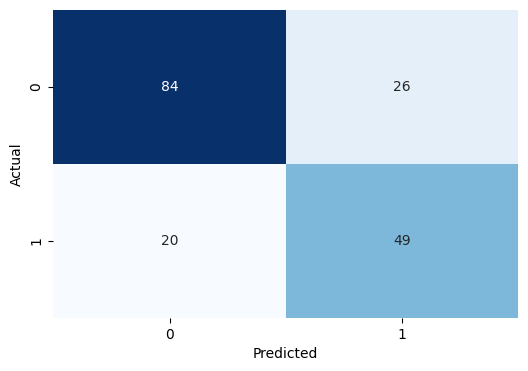

In [132]:
from sklearn.metrics import  confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_hat)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

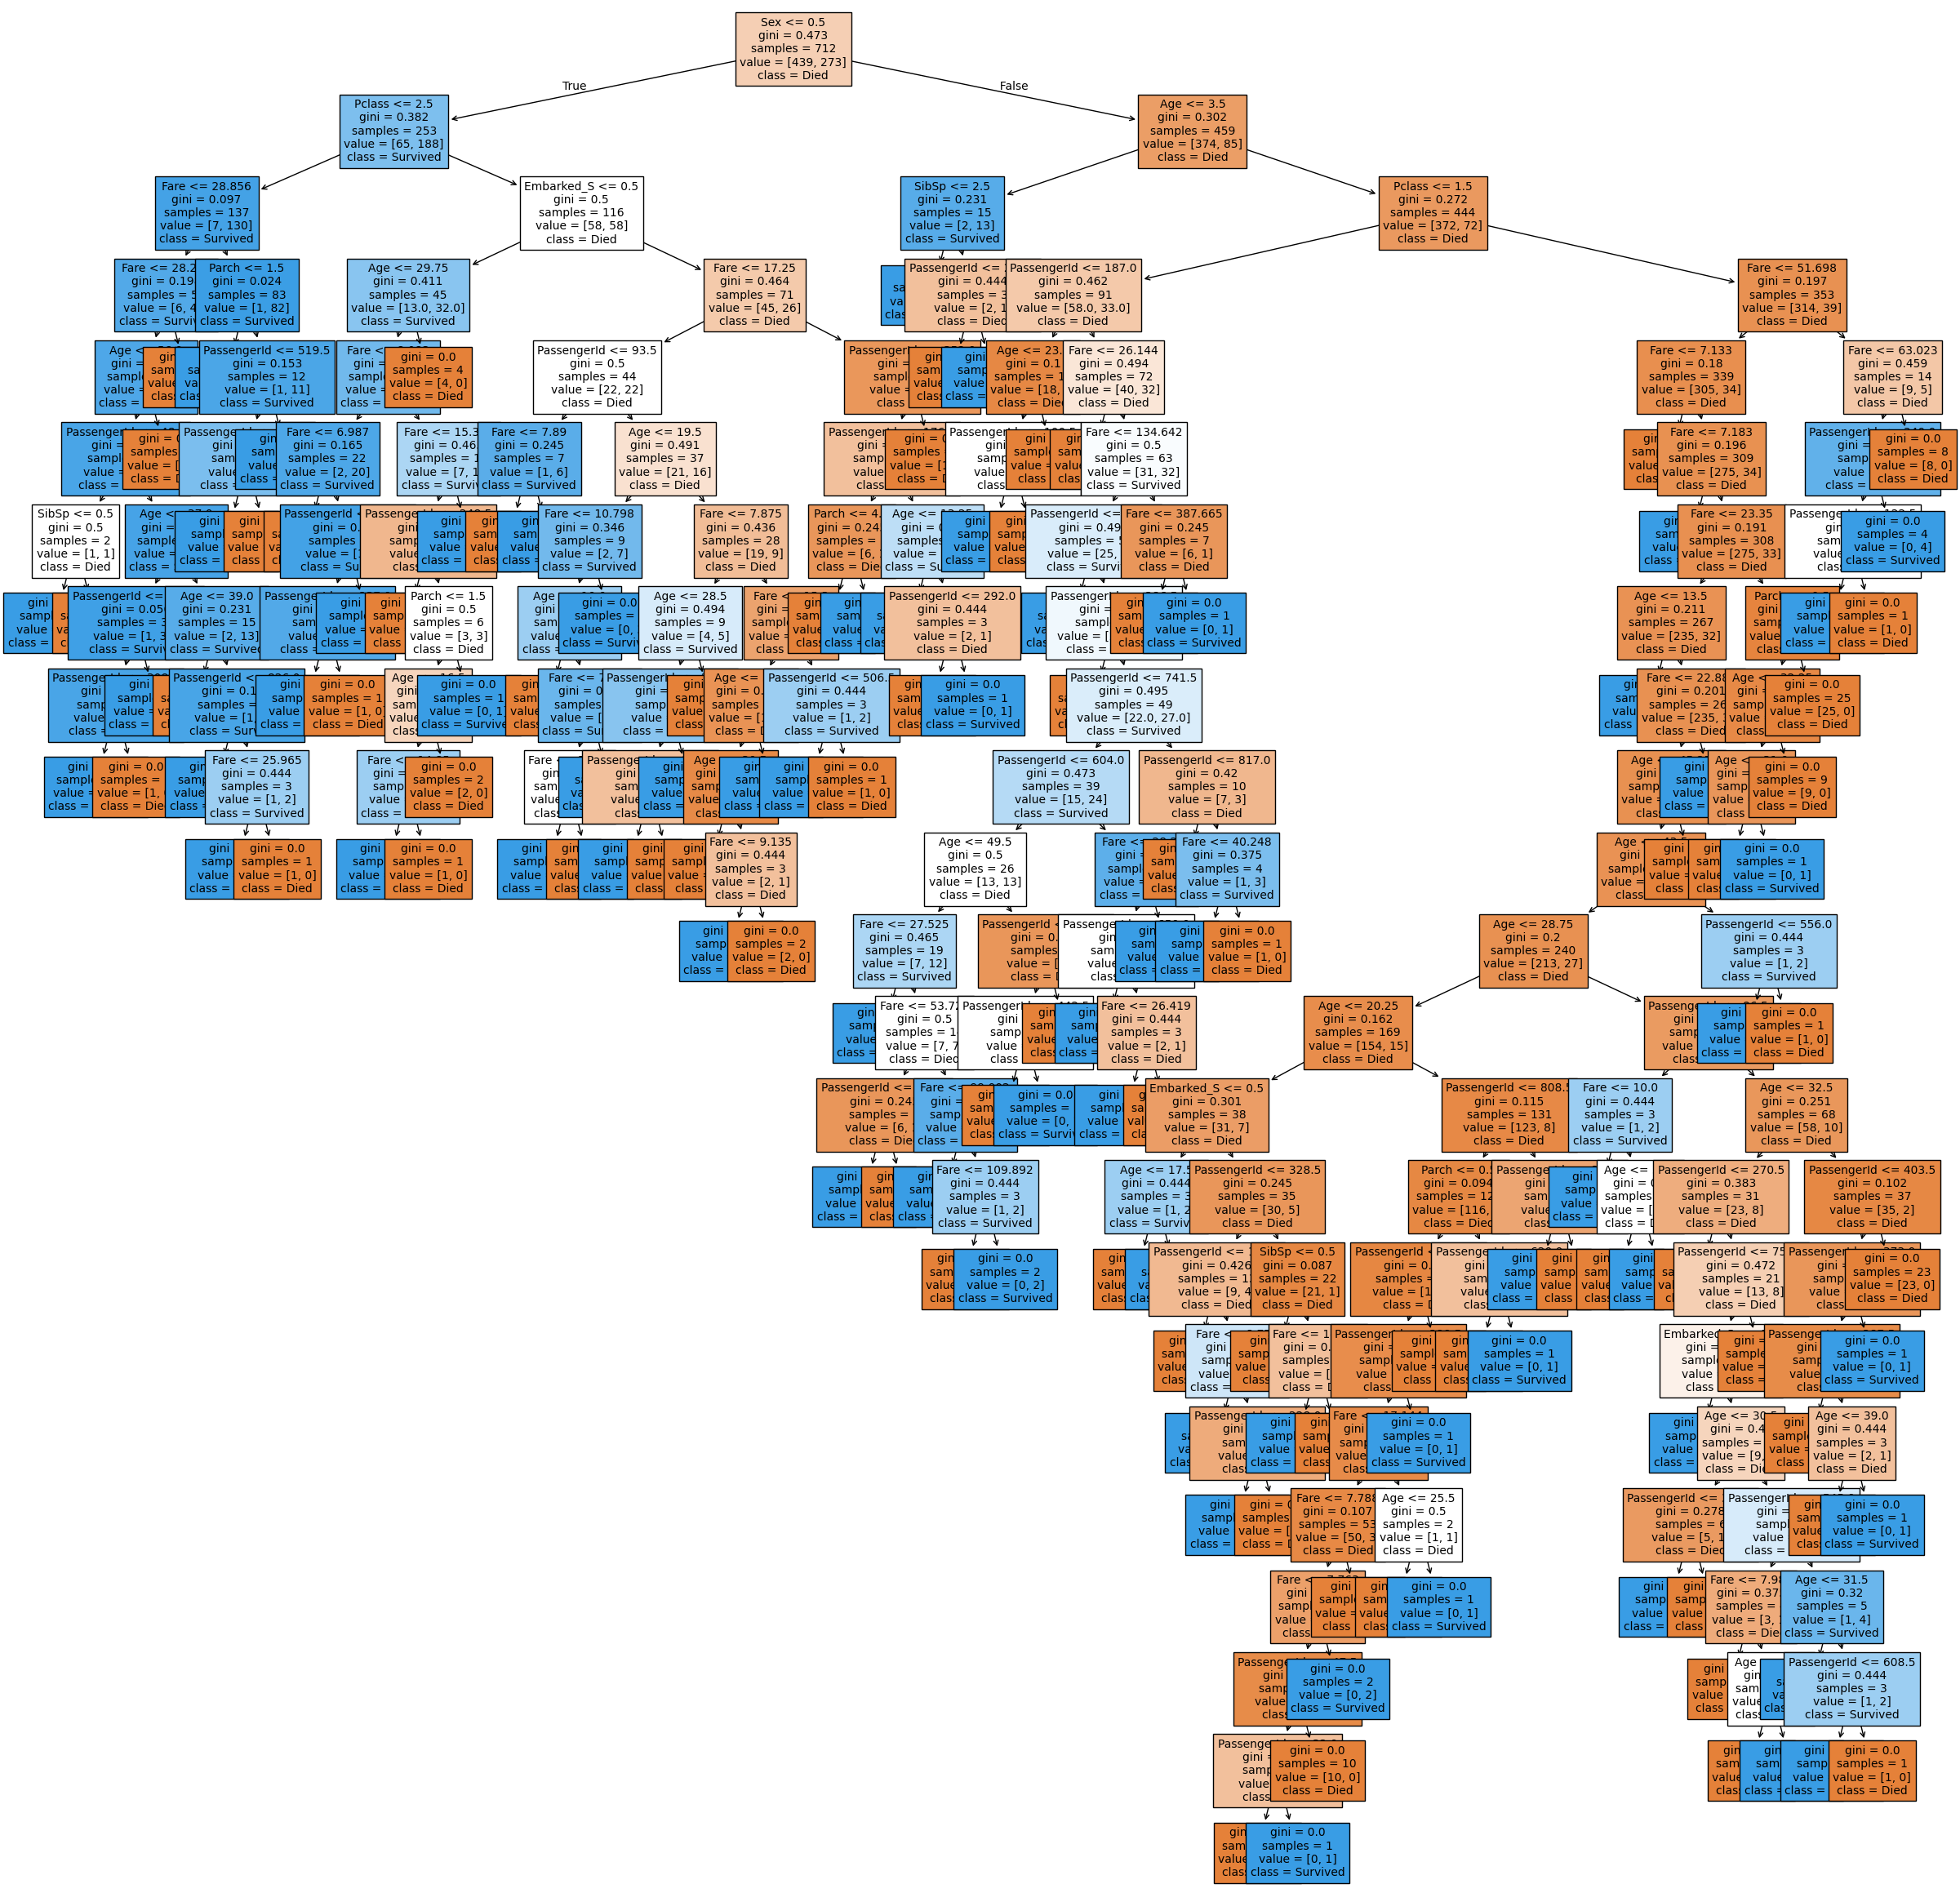

In [133]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,30))
plot_tree(decisiontree_model, feature_names=X.columns, class_names = ['Died', 'Survived'], filled = True, fontsize=10)
plt.show()

In [134]:
print(f'Depth : {decisiontree_model.get_depth()}')
print(f'Leaves : {decisiontree_model.get_n_leaves()}')
print(f'Nodes : {decisiontree_model.tree_.node_count}')



Depth : 22
Leaves : 132
Nodes : 263


## compare None depth and 4 depth
- max depth = None : 263 nodes, 22 depth , 132 leaves
extremely complex. this model  memorized specific rules for each passenger. 

- max depth = 4: 29 nodes, 4 depth, 15 leaves 
simple
just learns general rules 

**Overfitting :**
depth 22 : 74.3% accuracy
depth 4: 78.8% accuracy

the more complex the model, the lower the accuracy will be and the model will overfit at the end. 

model with depth 4 has lower recall for survivors although it is preferred due to better generalization. to fix the recall we can go for **ensemble methods** 

In [135]:
depths = [3, 5, 10, None]
results = {}
train_accs = []
test_accs = []
plot_labels = []

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    report = classification_report(y_test, y_test_pred)
    
    key_name = f"Depth_{depth}"
    results[key_name] = {
        'model': model,
        'train_acc': train_acc,
        'test_acc': test_acc,
        'report': report
    }
    
    train_accs.append(train_acc)
    test_accs.append(test_acc)
    plot_labels.append(str(depth) if depth is not None else "None")

In [146]:
for key, val in results.items():
    print(f"\n Classification Report for {key}:")
    print(f'Test acc : {val["test_acc"]}')
    print(f'Train acc : {val["train_acc"]}')
    print(f'\n')
    print(val['report'])


 Classification Report for Depth_3:
Test acc : 0.7821229050279329
Train acc : 0.8328651685393258


              precision    recall  f1-score   support

           0       0.77      0.93      0.84       110
           1       0.83      0.55      0.66        69

    accuracy                           0.78       179
   macro avg       0.80      0.74      0.75       179
weighted avg       0.79      0.78      0.77       179


 Classification Report for Depth_5:
Test acc : 0.7430167597765364
Train acc : 0.8567415730337079


              precision    recall  f1-score   support

           0       0.79      0.79      0.79       110
           1       0.67      0.67      0.67        69

    accuracy                           0.74       179
   macro avg       0.73      0.73      0.73       179
weighted avg       0.74      0.74      0.74       179


 Classification Report for Depth_10:
Test acc : 0.7932960893854749
Train acc : 0.9353932584269663


              precision    recall  f1-score  

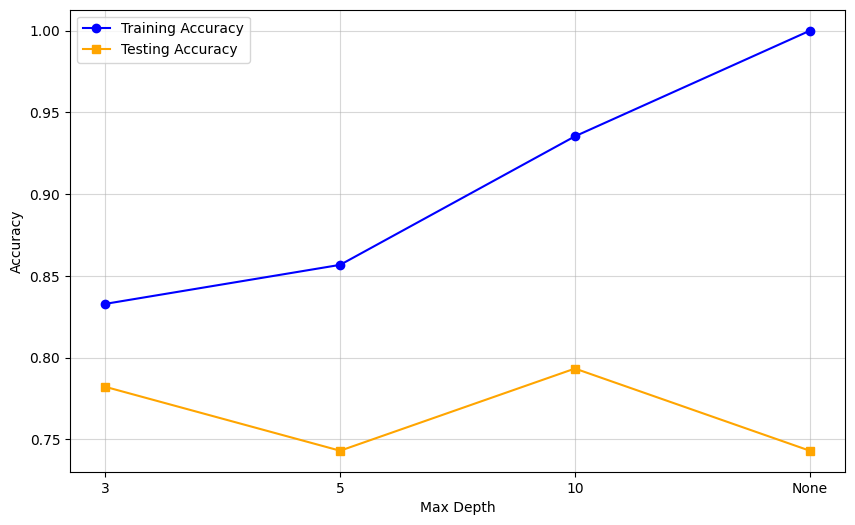

In [142]:
plt.figure(figsize=(10, 6))
plt.plot(plot_labels, train_accs, marker='o', label='Training Accuracy', color='blue')
plt.plot(plot_labels, test_accs, marker='s', label='Testing Accuracy', color='orange')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.5)

plt.show()

**Analyse The result**
- overfit: Depth = None
model has memorized everything in training set and therefore it has low accuracy on new unseen data. 
The Training Accuracy is 1.0. In real-world data like Titanic, getting 100% usually means you aren't learning rules; you are memorizing IDs.

- underfit: Depth = 3
Gap bein train and test kheili kame. in yani model generalization khobi dare chon acc test va acc train kheili nazdik be ham hastan. 
vali kam kam dare samt underfit shodan mire. ba depth 3 model general rules ro yad gerefte; example: women survive, rich people survive


- Depth 5: This is worse than Depth 3! i added complexity (depth), but my test accuracy dropped from 78% to 74%. This confirms that the extra splits i added between depth 3 and 5 were mostly capturing **noise**.

- Depth 10: It has the highest Test Accuracy (79%), but the Training Accuracy is very high (94%). While it performs best here, the large gap (15%) suggests it is becoming unstable.

# Cost Complexity Pruning

ccp_alpha is the price of complexity and mathematically, the algorithm minimizes  the score:


**Total score = Tree Error(impurity) + alpha * (Number of leaves)**


alpha = 0 : Complexity is free. The tree grows as large as possible (Overfitting)
alpha to high: Complexity is expensive. The tree aggressively cuts branches to save money, becoming very small (Underfitting)

In [147]:
tree_ = DecisionTreeClassifier(random_state=42)
tree_.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [149]:
path = tree_.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
impurities = path.impurities

In [150]:
ccp_alphas = [alpha for alpha in ccp_alphas if alpha > 0]


In [155]:
ccp_alphas = sorted(list(set(ccp_alphas)))[:-1]
# remove the last alpha because it prunes the tree to a single root node

In [156]:
len(ccp_alphas)

44

In [166]:
pruning_results = {}
train_accs = []
test_accs = []
plot_alphas = []
results = []
for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    clf.fit(X_train, y_train)
    
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    report = classification_report(y_test, y_test_pred)
    
    key = f"alpha_{alpha:.5f}" # Formatting key for readability
    pruning_results[key] = {
        'ccp_alpha': alpha,
        'model': clf,
        'train_acc': train_acc,
        'test_acc': test_acc,
        'classification report': report,
        'leaves': clf.get_n_leaves(),
        'depth' : clf.get_depth(),
        'nodes' : clf.tree_.node_count
    }
    results.append({
        'ccp_alpha': alpha,
        'model': clf,
        'train_acc': train_acc,
        'test_acc': test_acc,
        'classification report': report,
        'leaves': clf.get_n_leaves(),
        'depth' : clf.get_depth(),
        'nodes' : clf.tree_.node_count
    })
    
    train_accs.append(train_acc)
    test_accs.append(test_acc)
    plot_alphas.append(alpha)

In [168]:
for key, val in pruning_results.items():
    print(f"\n Classification Report for {key}:")
    print(f'Test acc : {val["test_acc"]}')
    print(f'Train acc : {val["train_acc"]}')
    print(f'Depth : {val["depth"]}')
    print(f'leaves : {val["leaves"]}')
    print(f'\n')
    print(val['classification report'])


 Classification Report for alpha_0.00091:
Test acc : 0.7430167597765364
Train acc : 0.9985955056179775
Depth : 22
leaves : 129


              precision    recall  f1-score   support

           0       0.81      0.76      0.79       110
           1       0.65      0.71      0.68        69

    accuracy                           0.74       179
   macro avg       0.73      0.74      0.73       179
weighted avg       0.75      0.74      0.74       179


 Classification Report for alpha_0.00093:
Test acc : 0.7486033519553073
Train acc : 0.9971910112359551
Depth : 22
leaves : 126


              precision    recall  f1-score   support

           0       0.82      0.76      0.79       110
           1       0.66      0.72      0.69        69

    accuracy                           0.75       179
   macro avg       0.74      0.74      0.74       179
weighted avg       0.75      0.75      0.75       179


 Classification Report for alpha_0.00094:
Test acc : 0.7541899441340782
Train acc : 0

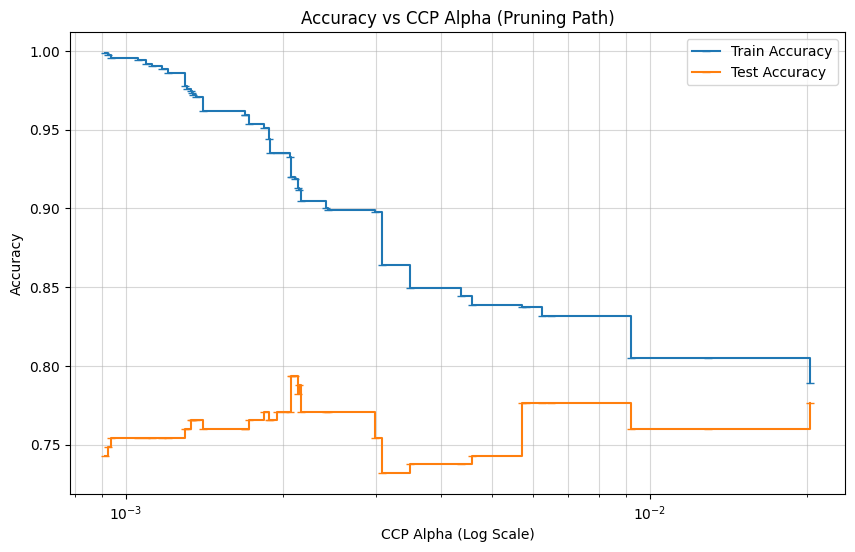

In [169]:
plt.figure(figsize=(10, 6))
plt.plot(plot_alphas, train_accs, marker='_', label="Train Accuracy", drawstyle="steps-post")
plt.plot(plot_alphas, test_accs, marker='_', label="Test Accuracy", drawstyle="steps-post")

plt.xlabel("CCP Alpha (Log Scale)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs CCP Alpha (Pruning Path)")
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.5)

plt.xscale('log')
plt.show()

### Why log?
The values of ccp_alpha are usually very tiny (e.g., 0.0001, 0.002, 0.005) but can jump to larger numbers near the end (0.1, 0.5). 
If i plot this normally, 90% of the tiny alphas will be squished into a tiny mess on the far left of the graph.

Log Scale solve this problem

### Plot
Right side (High Alpha): The tree is too simple (Underfitting). Accuracy is low.

Left side (Low Alpha): The tree is too complex (Overfitting). Train accuracy is high, Test is lower.

In [173]:
sorted_results = sorted(results, key=lambda x: (x['test_acc'], x['ccp_alpha']), reverse=True)

In [174]:
best_model_info = sorted_results[0]
best_model_info

{'ccp_alpha': 0.002106741573033708,
 'model': DecisionTreeClassifier(ccp_alpha=0.002106741573033708, random_state=42),
 'train_acc': 0.9185393258426966,
 'test_acc': 0.7932960893854749,
 'classification report': '              precision    recall  f1-score   support\n\n           0       0.82      0.85      0.83       110\n           1       0.74      0.71      0.73        69\n\n    accuracy                           0.79       179\n   macro avg       0.78      0.78      0.78       179\nweighted avg       0.79      0.79      0.79       179\n',
 'leaves': 40,
 'depth': 14,
 'nodes': 79}

In [176]:
overfitted_model_info = results[0]

overfitted_model_info

{'ccp_alpha': 0.000913492280990226,
 'model': DecisionTreeClassifier(ccp_alpha=0.000913492280990226, random_state=42),
 'train_acc': 0.9985955056179775,
 'test_acc': 0.7430167597765364,
 'classification report': '              precision    recall  f1-score   support\n\n           0       0.81      0.76      0.79       110\n           1       0.65      0.71      0.68        69\n\n    accuracy                           0.74       179\n   macro avg       0.73      0.74      0.73       179\nweighted avg       0.75      0.74      0.74       179\n',
 'leaves': 129,
 'depth': 22,
 'nodes': 257}

## Compare 3 models

**Comparison by Explainability**

Best: Model A (Depth 4)

Model A (Depth 4): With only 4 levels and 15 decisions (leaves), you can print this tree on a single piece of paper. A human can trace the path and completely understand why a passenger was classified as survived or died. It relies on broad, obvious rules (e.g., "Sex", "Class", "Age").

Model B (Pruned): With 14 levels and 79 nodes, this is no longer easily interpretable by a human. While it performs best, you cannot easily explain a specific decision without tracing a long, complex path.

Model C (Depth None): A "black box" due to sheer size. With 263 nodes, it has essentially memorized the training data ID by ID. It is impossible to explain the logic because the logic is mostly noise.

**Comparison by Generalization (Overfitting vs. Underfitting)**

Best: Model B (Pruned / Best Alpha)

Model A (Depth 4): Slight Underfitting.

The gap between Train (84%) and Test (79%) is very small, which is great.

However, the low Recall (0.55) suggests the model is too simple. It lacks the complexity to identify the "hard-to-find" survivors (e.g., men in 1st class or women in 3rd class). It only learns the obvious ones.

Model B (Pruned): Balanced Fit.

It achieves the highest Test Accuracy (79.3%).

It allows enough complexity (Depth 14) to capture subtle patterns, raising the Recall to 0.71 (finding 71% of survivors vs only 55%).

The gap (91% Train vs 79% Test) is wider, meaning it is slightly overfitted compared to Depth 4, but the trade-off is worth it for the better results.

Model C (Depth None): Severe Overfitting.

It likely has near 100% Training Accuracy but the lowest Test Accuracy. It has learned "noise" rather than "signal."

**Comparison by Performance  (Precision vs. Recall)**

This is the most critical difference between your Depth 4 and Pruned models.

Model A (Depth 4) is "Conservative":

Precision : 0.84 (Very High). When it says "You Survive," it is almost always right.

Recall : 0.55 (Very Low). It misses nearly half of the actual survivors.

Real-world example: I will only save you if I am 100% sure you will survive. If there is any doubt, I predict you die.

Model B (Pruned) is "Aggressive":

Precision : 0.74 (Lower). It makes more False Positive errors (predicting survival when they actually died).

Recall : 0.71 (Much Higher). It successfully identifies significantly more survivors.

Real-world example: I noticed some subtle patterns. I will predict you survive even if it's a bit risky, because I want to catch as many survivors as possible.

| Feature | Model A: Depth 4 | Model B: Pruned (Best Alpha) | Model C: Depth None |
| :--- | :--- | :--- | :--- |
| **Test Accuracy** | 78.8% | **79.3% (Winner)** | ~74.3% |
| **Train Accuracy** | 84.1% | 91.9% | **100% (Overfit)** |
| **Generalization Gap** | **5.3% (Best)** | 12.6% | ~25.7% (Worst) |
| **Depth** | **4 (Simplest)** | 14 | 22 |
| **Total Nodes** | **29** | 79 | 263 |
| **Leaves** | **15** | 40 | 132 |
| **Recall (Survivors)** | 0.55 (Low) | **0.71 (High)** | 0.71 |
| **Precision (Survivors)**| **0.84 (High)** | 0.74 | 0.65 (Low) |
| **Explainability** | **Excellent** | Moderate | None (Black Box) |

# Q12

### Random forest

In [178]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [181]:
y_train_hat = rf_model.predict(X_train)
y_test_hat = rf_model.predict(X_test)

print(f"Training Accuracy: {accuracy_score(y_train, y_train_hat):.4f}")
print(f"Testing Accuracy:  {accuracy_score(y_test, y_test_hat):.4f}")
print('classification report for Test:\n')
print(classification_report(y_test, y_test_hat))

Training Accuracy: 1.0000
Testing Accuracy:  0.7933
classification report for Test:

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       110
           1       0.76      0.68      0.72        69

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179



### Gradient Boosting

In [184]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators=200, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=200, random_state=42)

In [185]:
y_train_hat = gb_model.predict(X_train)
y_test_hat = gb_model.predict(X_test)

print(f"Training Accuracy: {accuracy_score(y_train, y_train_hat):.4f}")
print(f"Testing Accuracy:  {accuracy_score(y_test, y_test_hat):.4f}")
print('classification report for Test:\n')
print(classification_report(y_test, y_test_hat))

Training Accuracy: 0.9480
Testing Accuracy:  0.7877
classification report for Test:

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       110
           1       0.77      0.64      0.70        69

    accuracy                           0.79       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.79      0.79      0.78       179



Random Forest trees are grown to their maximum depth by default (no pruning). This means the model successfully created a specific rule for every single passenger in the training set, effectively memorizing the data.

There is a massive 20.7% gap between Training and Testing accuracy. This confirms the model learned "noise" (random details) in the training data that didn't apply to the test passengers.
